<a href="https://colab.research.google.com/github/nithishschandra/Mineral-Exploration/blob/main/Mineral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas rasterio shapely fiona pyproj matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.1 MB/s eta 0:00:00


In [ ]:
!apt install -y gdal-bin python3-gdal


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 2s (2,439 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 126102 files and directories curren

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip to multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("multi_layer_geological_map_of_karnataka_and_andhra_pradesh_25k_scale_v1.zip", 'r') as zip_ref:
    zip_ref.extractall("geo_data")


In [ ]:
import geopandas as gpd

import os
for root, dirs, files in os.walk("geo_data"):
    for file in files:
        if file.endswith(".shp"):
            shp_path = os.path.join(root, file)
            print(shp_path)

gdf = gpd.read_file(shp_path)
gdf.head()


geo_data/25K/shear_zone_25k_ngdr_20250224141143411/shear_zone_25k_ngdr_20250224141143411.shp
geo_data/25K/fold_25k_ngdr_20250224140917945/fold_25k_ngdr_20250224140917945.shp
geo_data/25K/mineralization_25k_ngdr_20250224141143411/mineralization_25k_ngdr_20250224141143411.shp
geo_data/25K/dyke_line_25k_ngdr_20250224140917945/dyke_line_25k_ngdr.shp
geo_data/25K/lithology_25k_ngdr_20250224140917945/lithology_25k_ngdr.shp
geo_data/25K/lithology_25k_ngdr_20250224140917945/lithology_25k_ngdr_20250224140917945.shp
geo_data/25K/fault_25k_ngdr_20250224140917945/fault_25k_ngdr_20250224140917945.shp
geo_data/25K/oriented_structure_plane_25k_ngdr_20250224141143411/oriented_structure_plane_25k_ngdr.shp
geo_data/25K/mine_quarry_25k_ngdr_20250224140917945/mine_quarry_25k_ngdr_20250224140917945.shp
geo_data/25K/oriented_structure_line_25k_ngdr_20250224141143411/oriented_structure_line_25k_ngdr_20250224141143411.shp


gid input_cent  edition_no toposheet_            point_type generation  \
0   65         SR           1      57B08             Fold Axis       None   
1   63         SR           1      57B08        Fold Axis (F1)       None   
2   67         SR           1      57B08   Synformal fold axis       None   
3   68         SR           1      57B08  Antiformal fold axis       None   
4   70         SR           1      57B08   Synformal fold axis       None   

  direction_  plunge_dir  plunge_amo accession_          remarks  dis_x  \
0       None       181.0           0       None  Minor fold axis     -2   
1       None       194.0           0       None             None     -6   
2       None        79.0           0       None             None     10   
3       None        87.0           0       None             None     10   
4       None        91.0           0       None             None     10   

   dis_y lbl_plunge                   geometry  
0    -20       None  POINT (76.44621 14.06058)  
1    -20       None  POINT (76.44011 14.07271)  
2     -1       None  POINT (76.44588 14.07383)  
3     -1       None  POINT (76.43838 14.06621)  
4     -1       None    POINT (76.4537 14.0423)

In [ ]:
gdf = gdf[gdf.geometry.notnull()]

gdf = gdf[gdf.is_valid]

gdf = gdf.to_crs(epsg=4326)

gdf = gdf.drop(columns=["Unnecessary_Column1", "Unnecessary_Column2"], errors='ignore')


Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'point_type',
       'generation', 'direction_', 'plunge_dir', 'plunge_amo', 'accession_',
       'remarks', 'dis_x', 'dis_y', 'lbl_plunge', 'geometry'],
      dtype='object')


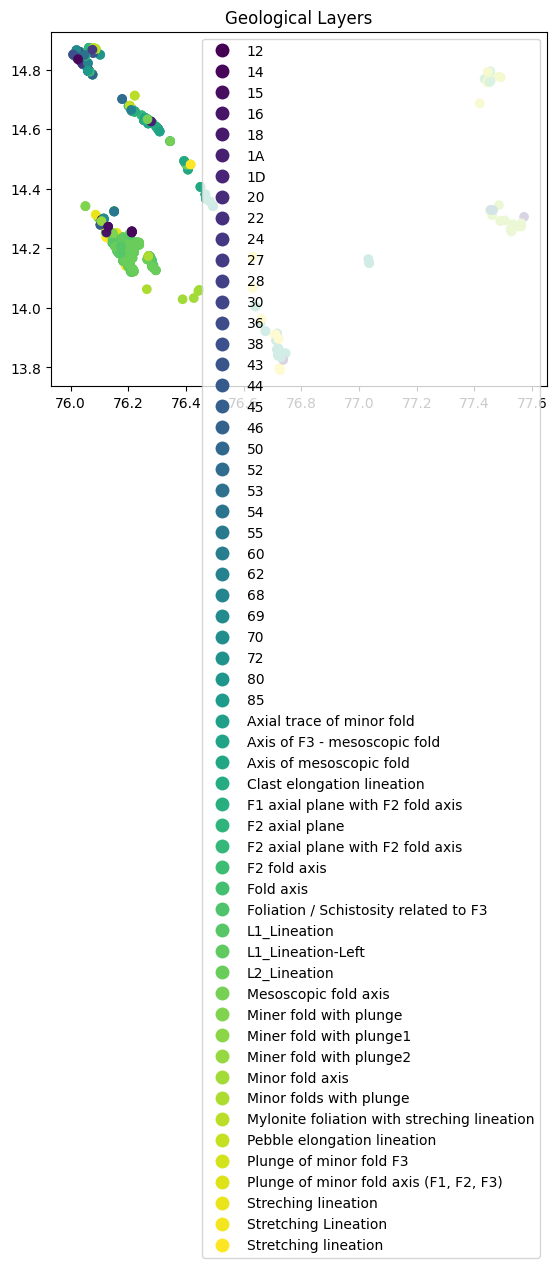

In [ ]:
import matplotlib.pyplot as plt

print(gdf.columns)

gdf.plot(column='remarks', cmap='viridis', legend=True)

plt.title("Geological Layers")
plt.show()


In [ ]:
from google.colab import files
import geopandas as gpd
import matplotlib.pyplot as plt

gdf.to_file("cleaned_map.geojson", driver='GeoJSON')
files.download("cleaned_map.geojson")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_filename = list(uploaded.keys())[0]
extract_to = "/content/Exploration_data"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

import geopandas as gpd
import pandas as pd

shapefile_path = None
for root, dirs, files in os.walk(extract_to):
    for file in files:
        if file.endswith(".shp"):
            shapefile_path = os.path.join(root, file)
            print(f" Found shapefile: {shapefile_path}")
            break
    if shapefile_path:
        break

if shapefile_path:
    gdf = gpd.read_file(shapefile_path)
else:
    raise FileNotFoundError(f" Shapefile not found in {extract_to}")

gdf = gdf.to_crs(epsg=3395)

gdf['area'] = gdf.geometry.area
gdf['perimeter'] = gdf.geometry.length
gdf['centroid_x'] = gdf.geometry.centroid.x
gdf['centroid_y'] = gdf.geometry.centroid.y

gdf.head()


Saving multi_layer_geological_map_of_karnataka_and_andhra_pradesh_50k_scale_v1.zip to multi_layer_geological_map_of_karnataka_and_andhra_pradesh_50k_scale_v1 (1).zip
✅ Found shapefile: /content/Exploration_data/50K/lithology_gcs_ngdr_20250224141337303/lithology_gcs_ngdr.shp


gid  objectid input_cent toposheet_  edition_nu  geometry_i       age  \
0  76867     76869        BAN      57C09           0         0.0  ARCHAEAN   
1  73196     73198        BAN      57B03           0         0.0  ARCHAEAN   
2  68446     68448        BAN      57B08           0         0.0  ARCHAEAN   
3  79548     79550        BAN      57B03           0         0.0  ARCHAEAN   
4  78054     78056        HYD      57E11           0         0.0  ARCHAEAN   

  supergroup   group_name     formation  ... notation12     shape_leng  \
0    DHARWAR  CHITRADURGA       HIRIYUR  ...       None  567688.063970   
1    DHARWAR    BABABUDAN  KIBBANAHALLI  ...       None   47714.270378   
2    DHARWAR  CHITRADURGA     INGALDHAL  ...       None     443.267997   
3    DHARWAR  CHITRADURGA     VANIVILAS  ...       None     900.607911   
4    DHARWAR    JONNAGIRI          None  ...       None     390.928633   

     shape_area                         stratigr_1              sld_name  \
0  4.061052e+08                 ARCHAEAN-ARGILLITE   lithology_gcs_ngdr9   
1  7.794640e+06  ARCHAEAN-CHLORITE-SERICITE-SCHIST  lithology_gcs_ngdr10   
2  7.122255e+03            ARCHAEAN-FERRO-DOLOMITE  lithology_gcs_ngdr10   
3  2.554953e+04                 ARCHAEAN-LIMESTONE  lithology_gcs_ngdr10   
4  6.075624e+03           ARCHAEAN-CHLORITE-SCHIST  lithology_gcs_ngdr10   

  notation_l                                           geometry  \
0      Adch6  POLYGON ((8535365.459 1555195.766, 8535354.573...   
1     Adbkh4  POLYGON ((8476946.251 1613955.259, 8476921.151...   
2      Adci1  POLYGON ((8509093.553 1578033.363, 8509085.912...   
3      Adcv3  POLYGON ((8475804.682 1612362.305, 8475746.565...   
4       Adj3  POLYGON ((8634535.299 1708229.684, 8634623.214...   

       perimeter    centroid_x    centroid_y  
0  583222.052822  8.528414e+06  1.549418e+06  
1   49108.911813  8.477393e+06  1.611686e+06  
2     455.808556  8.509070e+06  1.578114e+06  
3     926.949721  8.475640e+06  1.612532e+06  
4     404.608143  8.634633e+06  1.708273e+06  

[5 rows x 31 columns]

                                precision    recall  f1-score   support

                     BABABUDAN       0.77      0.76      0.76        66
                   CHITRADURGA       0.89      0.92      0.91       190
                        GADWAL       0.50      0.50      0.50         2
              HUNGUND-KUSHTAGI       0.77      0.77      0.77        22
                   HUTTI-MUSKI       1.00      1.00      1.00         1
                     JONNAGIRI       1.00      0.94      0.97        16
    LAYERED ULTRAMAFIC COMPLEX       0.50      0.50      0.50         4
  OLDER SUPRACRUSTAL (SARGUR?)       0.80      0.67      0.73         6
                      PAPAGHNI       0.00      0.00      0.00         1
 PENINSULAR GNEISSIC COMPLEX-I       0.59      0.48      0.53        21
PENINSULAR GNEISSIC COMPLEX-II       0.82      0.90      0.86       155
         RAMAGIRI-PENAKACHERLA       0.83      0.70      0.76        70
                        SANDUR       0.96      0.98      0.97  

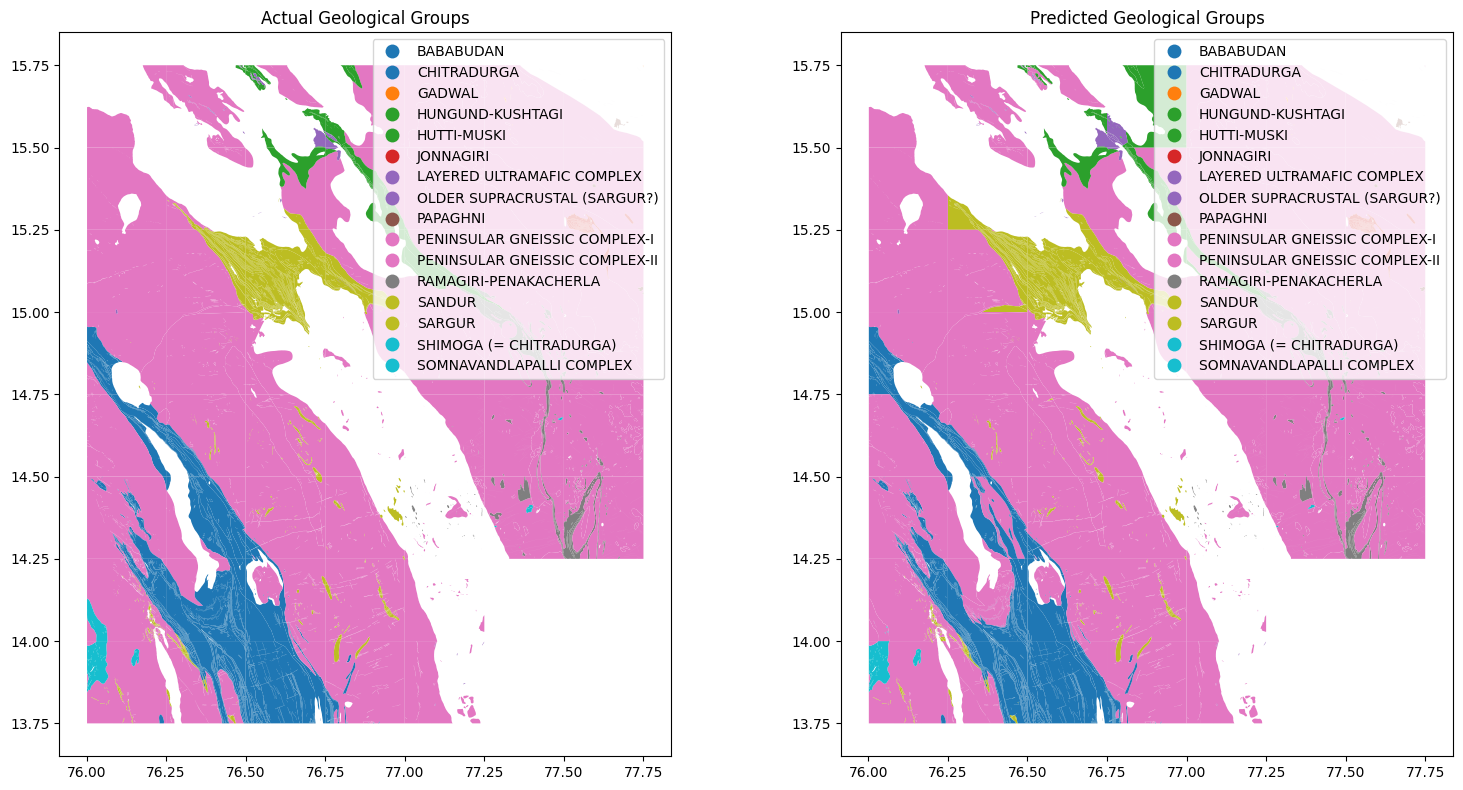

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")

gdf = gpd.read_file("/content/Exploration_data/50K/lithology_gcs_ngdr_20250224141337303/lithology_gcs_ngdr.shp")

label_counts = gdf['group_name'].value_counts()
valid_labels = label_counts[label_counts > 2].index
gdf = gdf[gdf['group_name'].isin(valid_labels)]

gdf['perimeter'] = gdf.geometry.length
gdf['centroid'] = gdf.geometry.centroid
gdf['centroid_x'] = gdf['centroid'].x
gdf['centroid_y'] = gdf['centroid'].y
gdf['area'] = gdf.geometry.area
X = gdf[['area', 'perimeter', 'centroid_x', 'centroid_y']]
y = gdf['group_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

gdf['predicted_group'] = clf.predict(X)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
gdf.plot(column='group_name', legend=True, ax=axes[0])
axes[0].set_title('Actual Geological Groups')
gdf.plot(column='predicted_group', legend=True, ax=axes[1])
axes[1].set_title('Predicted Geological Groups')
plt.tight_layout()
plt.show()



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lineament_features_of_karnataka_and_andhra_pradesh_v1.zip to lineament_features_of_karnataka_and_andhra_pradesh_v1.zip


Saving lineament_features_of_karnataka_and_andhra_pradesh_v1.zip to lineament_features_of_karnataka_and_andhra_pradesh_v1 (1).zip
Files: ['lineament_form.shx', 'lineament_250k_ngdr.cpg', 'lineament_250k_ngdr.shp.xml', 'lineament_Tectonics.cpg', 'lineament_Tectonics.shp.xml', 'lineament_250k_ngdr.prj', 'lineament_Types.shp', 'lineament_Types.cpg', 'lineament_form.sbx', 'lineament_250k_ngdr.dbf', 'lineament_Tectonics.prj', 'lineament_Tectonics.shx', 'lineament_Tectonics.sbx', 'lineament_Types.shp.xml', 'lineament_Types.shx', 'lineament_250k_ngdr.shx', 'lineament_form.cpg', 'lineament_form.prj', 'lineament_Types.dbf', 'lineament_250k_ngdr.sbx', 'lineament_Types.prj', 'lineament_form.shp', 'lineament_form.shp.xml', 'lineament_Tectonics.dbf', 'lineament_250k_ngdr.sbn', 'lineament_Types.sbx', 'lineament_form.sbn', 'lineament_Tectonics.shp', 'lineament_250k_ngdr.shp', 'lineament_form.dbf', 'lineament_Tectonics.sbn', 'lineament_Types.sbn']
    gid  lineaid   symid             l1descript      l

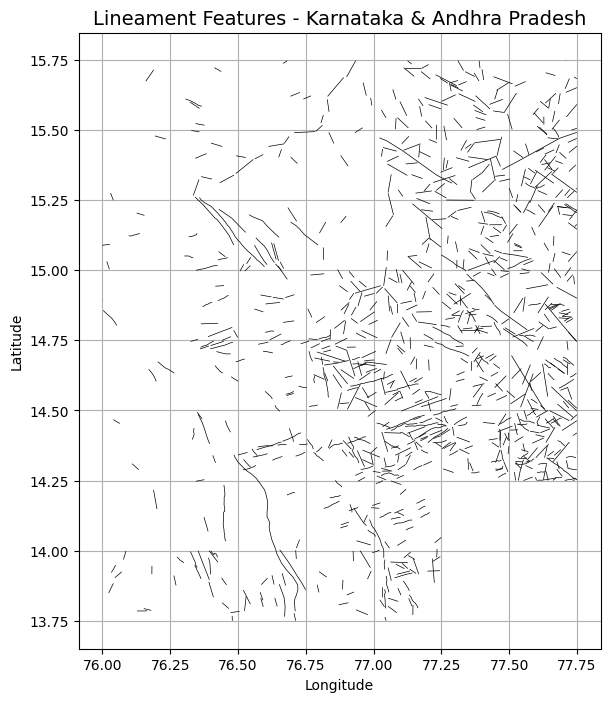

In [ ]:
!pip install geopandas

from google.colab import files
uploaded = files.upload()

import zipfile
import os

zip_file_path = list(uploaded.keys())[0]
extract_dir = '/content/lineament_data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

lineament_folder = os.path.join(extract_dir, 'Lineament_250k')
print("Files:", os.listdir(lineament_folder))

import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = os.path.join(lineament_folder, 'lineament_250k_ngdr.shp')
gdf = gpd.read_file(shapefile_path)

print(gdf.head())
gdf.plot(figsize=(12, 8), edgecolor='black', linewidth=0.5)
plt.title("Lineament Features - Karnataka & Andhra Pradesh", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 86.9 MB/s eta 0:00:00


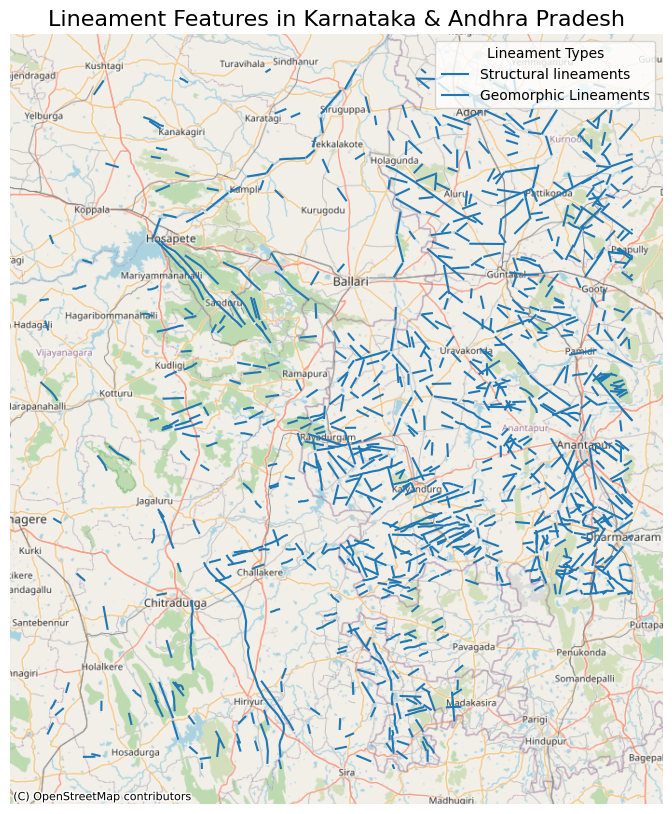

In [ ]:

!pip install geopandas contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

shapefile_path = '/content/lineament_data/Lineament_250k/lineament_250k_ngdr.shp'
gdf = gpd.read_file(shapefile_path)

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(14, 10))
gdf.groupby('l1descript').plot(ax=ax, legend=True)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title('Lineament Features in Karnataka & Andhra Pradesh', fontsize=16)
ax.set_axis_off()
plt.legend(title='Lineament Types', labels=gdf['l1descript'].unique(), loc='upper right')
plt.show()


In [ ]:
!pip install geopandas

import geopandas as gpd

shapefile_path = '/content/lineament_data/Lineament_250k/lineament_250k_ngdr.shp'
gdf = gpd.read_file(shapefile_path)

geojson_path = '/content/lineament_250k_ngdr.geojson'
gdf.to_file(geojson_path, driver='GeoJSON')
print(f"GeoJSON saved to {geojson_path}")

gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)
csv_path = '/content/lineament_250k_ngdr.csv'
gdf.to_csv(csv_path, index=False)
print(f"CSV saved to {csv_path}")


GeoJSON saved to /content/lineament_250k_ngdr.geojson
CSV saved to /content/lineament_250k_ngdr.csv


<ipython-input-6-0ce0152c89bf>:16: UserWarning: Geometry column does not contain geometry.
  gdf['geometry'] = gdf['geometry'].apply(lambda x: x.wkt)


In [ ]:
from google.colab import files
files.download(geojson_path)
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ground_gravity_data_of_karnataka_and_andhra_pradesh_v1.zip to ground_gravity_data_of_karnataka_and_andhra_pradesh_v1.zip


In [5]:
import zipfile
import os

zip_path = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_data")

os.listdir("extracted_data")



['Ground_gravity_asci_grid_geotiff']

In [6]:
import os

folder_path = "extracted_data/Ground_gravity_asci_grid_geotiff"
files = os.listdir(folder_path)
files


['GRID',
 'GEOTIFF',
 'ASCII',
 'Physical_properties_rock_samples.csv',
 'README_physical_properties_rock_samples.txt']

In [8]:
import pandas as pd

csv_path = os.path.join(folder_path, "Physical_properties_rock_samples.csv")
df = pd.read_csv(csv_path)
df.head()


Latitude  Longitude  Density (g/cc)     Rock_type  \
0     15.40      76.01            2.62  Pink Granite   
1     15.34      76.11            2.72    Hornblende   
2     15.26      76.07            2.56     Pegmatite   
3     15.28      76.07            3.05        Gabbro   
4     15.37      76.02            2.52     Pegmatite   

   Susceptibility(X 10^(-6) CGS units)                   Toposheets  
0                                 35.4  57A/1, A/2, A/3, A/6 & A/11  
1                                739.0                          NaN  
2                                  5.7                          NaN  
3                                  2.3                          NaN  
4                                  4.4                          NaN

In [10]:
import pandas as pd
import folium

df = pd.read_csv(os.path.join(folder_path, "Physical_properties_rock_samples.csv"))

df.dropna(subset=["Latitude", "Longitude"], inplace=True)

map_center = [df["Latitude"].mean(), df["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=10)

for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['Rock_type']}<br>Density: {row['Density (g/cc)']}<br>Susceptibility: {row['Susceptibility(X 10^(-6) CGS units)']}"
    ).add_to(m)

m


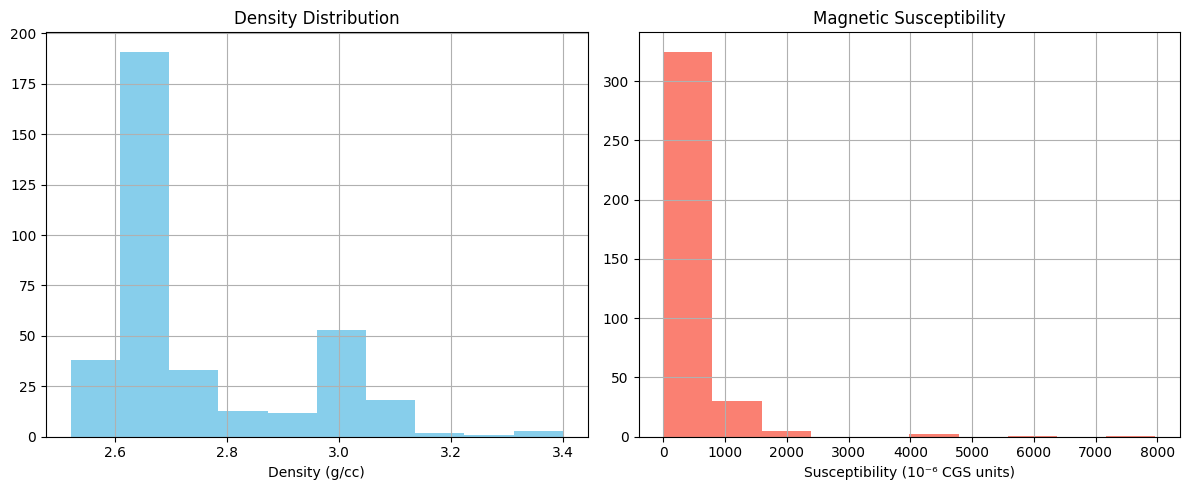

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df["Density (g/cc)"].hist(bins=10, color='skyblue')
plt.title("Density Distribution")
plt.xlabel("Density (g/cc)")

plt.subplot(1, 2, 2)
df["Susceptibility(X 10^(-6) CGS units)"].hist(bins=10, color='salmon')
plt.title("Magnetic Susceptibility")
plt.xlabel("Susceptibility (10⁻⁶ CGS units)")

plt.tight_layout()
plt.show()


In [25]:
from google.colab import files
uploaded = files.upload()

Saving geochronology_map_of_karnataka_and_andhra_pradesh_v1.zip to geochronology_map_of_karnataka_and_andhra_pradesh_v1 (2).zip


In [13]:
import zipfile
import os

zip_path = "geomorphology_map_of_karnataka_and_andhra_pradesh.zip"

extract_path = "geomorphology_map_contents"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print(f"Extracted files to: {extract_path}")

print("\nList of extracted files:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Extracted files to: geomorphology_map_contents

List of extracted files:
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.shp.xml
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.dbf
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.cpg
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.sbn
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.shx
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.sbx
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.shp
geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.prj


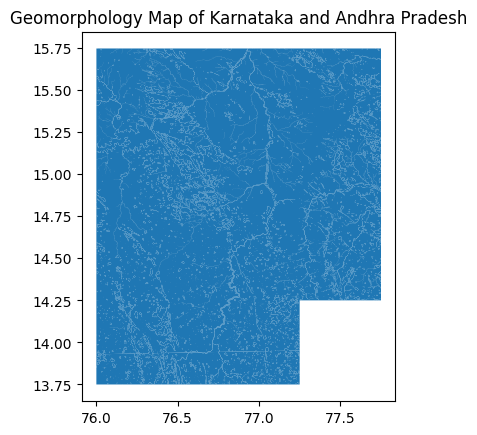

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = "geomorphology_map_contents/Geomorphology_250k/geomorphology_250k_gcs_ngdr.shp"
gdf = gpd.read_file(shapefile_path)

gdf.plot()
plt.title("Geomorphology Map of Karnataka and Andhra Pradesh")
plt.show()


In [18]:
from google.colab import files
uploaded = files.upload()

Saving geochronology_map_of_karnataka_and_andhra_pradesh_v1.zip to geochronology_map_of_karnataka_and_andhra_pradesh_v1 (1).zip


In [21]:
import zipfile
import os

zip_file_path = list(uploaded.keys())[0]
extracted_folder_path = 'path_to_extract_folder/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

extracted_files = os.listdir(extracted_folder_path)
print("Extracted files:", extracted_files)

Extracted files: ['Geochronology']


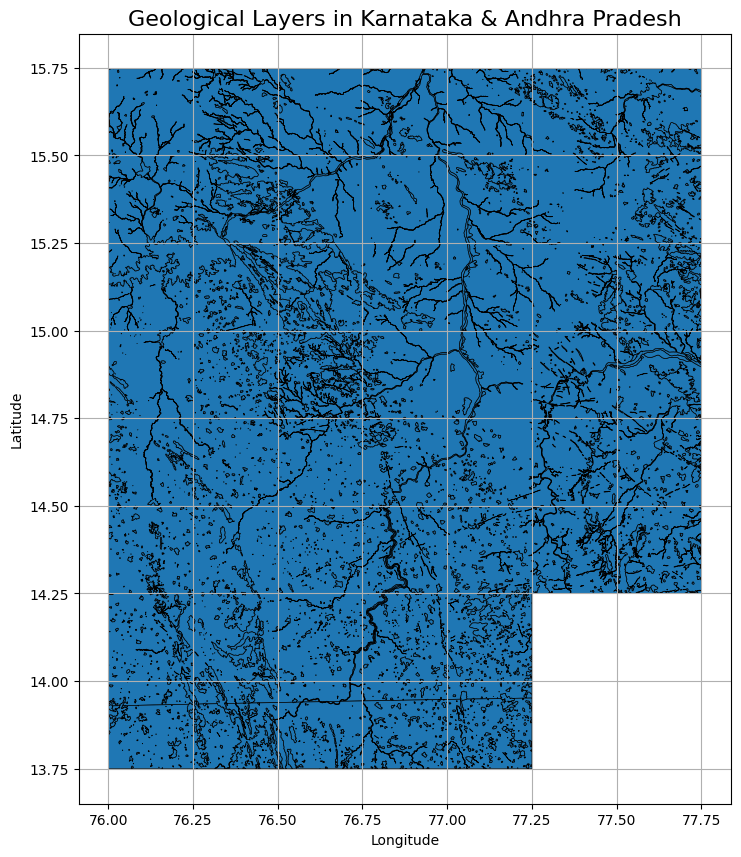

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)

plt.title("Geological Layers in Karnataka & Andhra Pradesh", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [28]:
from google.colab import files
uploaded = files.upload()

Saving geochemical_data_points_of_karnataka_and_andhra_pradesh_national_geochemical_mapping_ngcm_v1.zip to geochemical_data_points_of_karnataka_and_andhra_pradesh_national_geochemical_mapping_ngcm_v1.zip


Extracted Files: ['Geochemical data_GIS']
GIS Files: ['NGCM-Stream-Sediment-Analysis-Updated.xlsx', 'Metadata NGCM.docx', 'stream_sediments_gcs_ngdr_20250221140319808']
   FID Shape *  gid  objectid         sampleno          X          Y  Si02_%  \
0    0   Point  129       129  57E02/081/SS/00  77.194444  15.599099   60.03   
1    1   Point  130       130  57E02/082/SS/00  77.212963  15.599099   58.85   
2    2   Point  131       131  57E02/083/SS/00  77.231481  15.599099   65.12   
3    3   Point  132       132  57E02/084/SS/00  77.250000  15.599099   65.63   
4    4   Point  133       133  57E02/085/SS/00  77.009259  15.617117   54.15   

   Al2O3_%  Fe2O3_%  ...  Ta_ppm  W_ppm  U_ppm  Pt_ppb  Pd_ppb  In_ppm  F_ppm  \
0    11.96     4.81  ...   1.074    2.5  4.020     0.0     0.0     0.0    0.0   
1    11.96     4.91  ...   0.912    2.5  2.283     0.0     0.0     0.0    0.0   
2    11.06     4.33  ...   0.954    2.5  3.582     0.0     0.0     0.0    0.0   
3    10.94     4.88  ...  

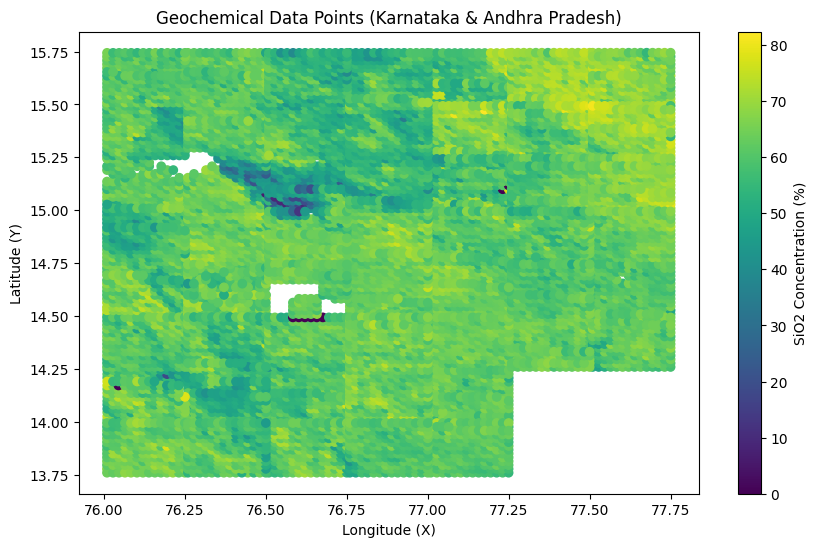

In [32]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt

zip_file_path = 'geochemical_data_points_of_karnataka_and_andhra_pradesh_national_geochemical_mapping_ngcm_v1.zip'
output_dir = 'geochemical_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

extracted_files = os.listdir(output_dir)
print("Extracted Files:", extracted_files)

gis_directory = os.path.join(output_dir, 'Geochemical data_GIS')

gis_files = os.listdir(gis_directory)
print("GIS Files:", gis_files)

excel_file_path = os.path.join(gis_directory, 'NGCM-Stream-Sediment-Analysis-Updated.xlsx')

geochemical_data = pd.read_excel(excel_file_path)

print(geochemical_data.head())

plt.figure(figsize=(10, 6))
plt.scatter(geochemical_data['X'], geochemical_data['Y'], c=geochemical_data['Si02_%'], cmap='viridis', marker='o')
plt.colorbar(label='SiO2 Concentration (%)')
plt.title('Geochemical Data Points (Karnataka & Andhra Pradesh)')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.show()


In [39]:
from google.colab import files
uploaded = files.upload()

Saving Exploration_data.zip to Exploration_data.zip


In [40]:
import zipfile
import os

zip_file_path = 'Exploration_data.zip'
extracted_folder = 'extracted_data/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

extracted_files = os.listdir(extracted_folder)
print("Extracted Files:", extracted_files)


Extracted Files: ['Ground_gravity_asci_grid_geotiff', 'Exploration_data']


In [44]:
folder_1 = os.path.join(extracted_folder, 'Ground_gravity_asci_grid_geotiff')
folder_2 = os.path.join(extracted_folder, 'Exploration_data')

folder_1_files = os.listdir(folder_1)
folder_2_files = os.listdir(folder_2)

print("Files in Ground_gravity_asci_grid_geotiff folder:", folder_1_files)
print("Files in Exploration_data folder:", folder_2_files)


Files in Ground_gravity_asci_grid_geotiff folder: ['GRID', 'GEOTIFF', 'ASCII', 'Physical_properties_rock_samples.csv', 'README_physical_properties_rock_samples.txt']
Files in Exploration_data folder: ['exploration_data_gis_view.prj', 'exploration_data_gis_view.cpg', 'exploration_data_gis_view.shp.xml', 'exploration_data_gis_view.sbn', 'exploration_data_gis_view.sbx', 'exploration_data_gis_view.dbf', 'exploration_data_gis_view.shp', 'exploration_data_gis_view.shx']


In [45]:
import pandas as pd

csv_file_path = os.path.join(extracted_folder, 'Ground_gravity_asci_grid_geotiff', 'Physical_properties_rock_samples.csv')

rock_samples_df = pd.read_csv(csv_file_path)

rock_samples_df.head()


Latitude  Longitude  Density (g/cc)     Rock_type  \
0     15.40      76.01            2.62  Pink Granite   
1     15.34      76.11            2.72    Hornblende   
2     15.26      76.07            2.56     Pegmatite   
3     15.28      76.07            3.05        Gabbro   
4     15.37      76.02            2.52     Pegmatite   

   Susceptibility(X 10^(-6) CGS units)                   Toposheets  
0                                 35.4  57A/1, A/2, A/3, A/6 & A/11  
1                                739.0                          NaN  
2                                  5.7                          NaN  
3                                  2.3                          NaN  
4                                  4.4                          NaN

In [46]:
import geopandas as gpd

shapefile_path = os.path.join(extracted_folder, 'Exploration_data', 'exploration_data_gis_view.shp')

gdf = gpd.read_file(shapefile_path)

gdf.head()


id  subid           commodity exploratio  \
0  363     15                Gold      14217   
1  523     19        Tin-Tungsten      10994   
2   92     71                Gold      11557   
3   84     72  Kimberlite,Diamond      12121   
4   85    115                Gold      11892   

                                          project_ti  \
0  Preliminary Investigation For Gold And Other A...   
1  Report On The Reconnaissance Surveys For Locat...   
2  RECONNAISSANCE SURVEYS TO LOCATE AURIFEROUS ZO...   
3  Report on Testing of Kimberlitic Rocks of Chig...   
4  INVESTIGATION FOR GOLD IN KOTTAPALLY AND MUTHA...   

                      toposheet_ name_of_ex  \
0                          57E09        GSI   
1        57F09,57F10,57F13,57F14        GSI   
2  57E04,57E08,57F01,57F05,57F06        GSI   
3                    57F10,57F11        GSI   
4              57F07,57F11,57F12        GSI   

                                          explorat_1 period_of_ period_o_1  \
0  ANDHRA PRADESH,KARNATAKA,TELANGANA, Jogulamba ...       2010       2012   
1  ANDHRA PRADESH, Anantapur,  In Parts Of Anantp...       1986       1987   
2  ANDHRA PRADESH,KARNATAKA, Anantapur,Ballari,Ku...       1988       1989   
3  ANDHRA PRADESH, Anantapur, Chigicherla area, K...       1991       1993   
4  ANDHRA PRADESH,KARNATAKA, Anantapur,Tumakuru, ...       1989       1990   

   ...                        district_n  \
0  ...  Jogulamba Gadwal,Kurnool,Raichur   
1  ...                         Anantapur   
2  ...         Anantapur,Ballari,Kurnool   
3  ...                         Anantapur   
4  ...                Anantapur,Tumakuru   

                                    block_name geographic  \
0  The Area West Of Remeta, Gadwal Schist Belt        DMS   
1                In Parts Of Anantpur District        DMS   
2                     KUDERU AND VIDAPANAKALLU        DMS   
3                             Chigicherla area        DMS   
4                                RAMAGIRI AREA        DMS   

                                exp_dd_lon  \
0   77.500000,77.500000,77.750000,77.75000   
1  77.666667,77.816667,77.816667,77.666667   
2   77.000000,77.500000,77.500000,77.00000   
3   77.583333,77.750000,77.750000,77.58333   
4    77.416639,77.483350,77.483369,77.4166   

                                exp_dd_lat  \
0   15.750000,16.000000,16.000000,15.75000   
1  15.000000,15.000000,14.558333,14.558333   
2   15.250000,15.250000,14.750000,14.75000   
3   14.416667,14.416667,14.583333,14.58333   
4    14.416689,14.416678,14.325000,14.3250   

                                exp_dms_la  \
0      15°45'00,16°00'00,16°00'00,15°45'00   
1      15°00'00,15°00'00,14°33'30,14°33'30   
2      15°15'00,15°15'00,14°45'00,14°45'00   
3      14°25'00,14°25'00,14°35'00,14°35'00   
4  14°25'0.08,14°25'0.04,14°19'30,14°19'30   

                                   exp_dms_lo expid row_number  \
0         77°30'00,77°30'00,77°45'00,77°45'00   363         11   
1         77°40'00,77°49'00,77°49'00,77°40'00   523         14   
2         77°00'00,77°30'00,77°30'00,77°00'00    92         52   
3         77°35'00,77°45'00,77°45'00,77°35'00    84         53   
4  77°24'59.90,77°29'0.06,77°29'0.13,77°25'00    85         84   

                                            geometry  
0  POLYGON ((77.50054 15.75, 77.5 15.75, 77.5 15....  
1  POLYGON ((77.70342 14.55833, 77.66667 14.55833...  
2  POLYGON ((77.5 15.25, 77.5 15.24934, 77.5 15.2...  
3  POLYGON ((77.58382 14.41667, 77.58333 14.41667...  
4  POLYGON ((77.41799 14.325, 77.41666 14.325, 77...  

[5 rows x 37 columns]

In [49]:
import pandas as pd

csv_file_path = os.path.join(extracted_folder, 'Ground_gravity_asci_grid_geotiff', 'Physical_properties_rock_samples.csv')

rock_samples_df = pd.read_csv(csv_file_path)

print(rock_samples_df.info())

print(rock_samples_df.head())

print(rock_samples_df.isnull().sum())

print(rock_samples_df.describe())

pink_granite_samples = rock_samples_df[rock_samples_df['Rock_type'] == 'Pink Granite']
print(pink_granite_samples)

grouped_data = rock_samples_df.groupby('Rock_type')[['Density (g/cc)', 'Susceptibility(X 10^(-6) CGS units)']].mean()
print(grouped_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Latitude                             364 non-null    float64
 1   Longitude                            364 non-null    float64
 2   Density (g/cc)                       364 non-null    float64
 3   Rock_type                            363 non-null    object 
 4   Susceptibility(X 10^(-6) CGS units)  364 non-null    float64
 5   Toposheets                           9 non-null      object 
dtypes: float64(4), object(2)
memory usage: 17.2+ KB
None
   Latitude  Longitude  Density (g/cc)     Rock_type  \
0     15.40      76.01            2.62  Pink Granite   
1     15.34      76.11            2.72    Hornblende   
2     15.26      76.07            2.56     Pegmatite   
3     15.28      76.07            3.05        Gabbro   
4     15.37      76.02        

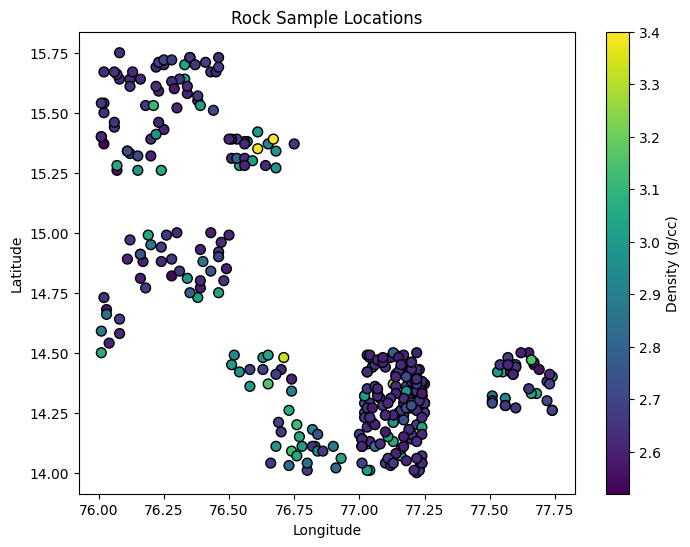

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(rock_samples_df['Longitude'], rock_samples_df['Latitude'], c=rock_samples_df['Density (g/cc)'], cmap='viridis', s=50, edgecolors='black')
plt.colorbar(label='Density (g/cc)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rock Sample Locations')
plt.show()


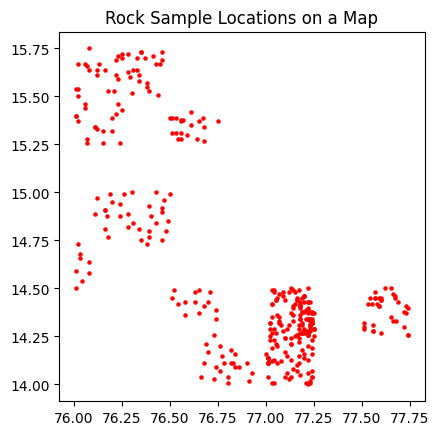

In [51]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(lon, lat) for lon, lat in zip(rock_samples_df['Longitude'], rock_samples_df['Latitude'])]
geo_df = gpd.GeoDataFrame(rock_samples_df, geometry=geometry)

geo_df.plot(marker='o', color='red', markersize=5)
plt.title('Rock Sample Locations on a Map')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          309 non-null    int32   
 1   subid       309 non-null    int32   
 2   commodity   309 non-null    object  
 3   exploratio  305 non-null    object  
 4   project_ti  309 non-null    object  
 5   toposheet_  309 non-null    object  
 6   name_of_ex  309 non-null    object  
 7   explorat_1  309 non-null    object  
 8   period_of_  309 non-null    object  
 9   period_o_1  309 non-null    object  
 10  exp_upid    309 non-null    object  
 11  explorat_2  309 non-null    object  
 12  mobile_num  309 non-null    object  
 13  name_of_th  300 non-null    object  
 14  osm_no      309 non-null    object  
 15  scale       245 non-null    object  
 16  toposhee_1  309 non-null    object  
 17  username    309 non-null    object  
 18  explorat_3  246 non-null    object  
 19  non_geor

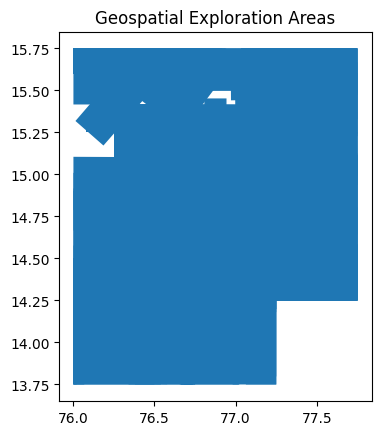

commodity
Gold                                      114
Diamond                                    36
Iron                                       21
Kimberlite                                 18
Copper                                     18
Kimberlite,Diamond                          8
Polymetallic                                7
Base Metal                                  7
Granite                                     6
Gold,Diamond                                5
Iron,Manganese                              4
Manganese                                   4
Gold,Copper                                 3
Tungsten                                    3
Molybdenum                                  3
Base Metal,Gold                             3
Corundum                                    3
Tin-Tungsten                                2
Copper,Gold,Sulphides                       2
Dimension Stone                             2
Lead,Antimony,Sulphides                     2
Antimony                

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon

shapefile_path = os.path.join(extracted_folder, 'Exploration_data', 'exploration_data_gis_view.shp')
gdf = gpd.read_file(shapefile_path)

df = pd.DataFrame(gdf)

print(df.info())
print(df.head())
gdf.plot()
plt.title("Geospatial Exploration Areas")
plt.show()

commodity_counts = df['commodity'].value_counts()
print(commodity_counts)

df['exploration_period'] = df['period_of_'].astype(str) + '-' + df['period_o_1'].astype(str)
period_counts = df['exploration_period'].value_counts()
print(period_counts)

<ipython-input-55-f64c0143bb9d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=commodity_counts.index, y=commodity_counts.values, palette='viridis')


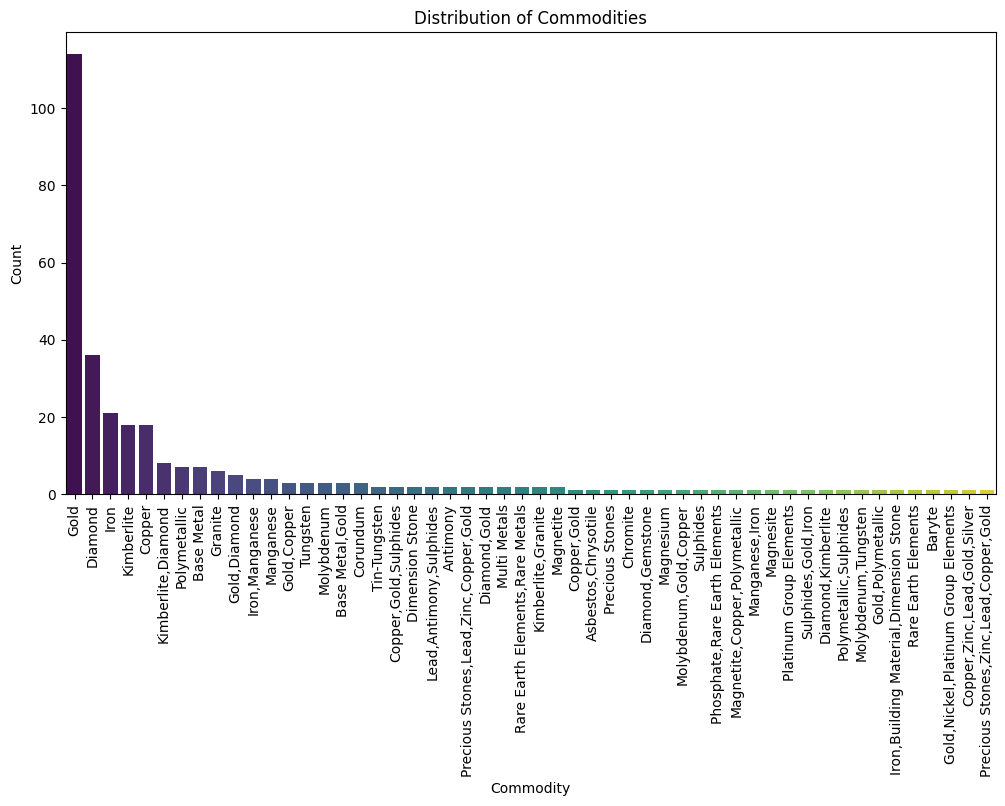

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

commodity_counts = df['commodity'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=commodity_counts.index, y=commodity_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Commodities')
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.show()


<ipython-input-56-360aa4288d0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exploration_period_counts.index, y=exploration_period_counts.values, palette='viridis')


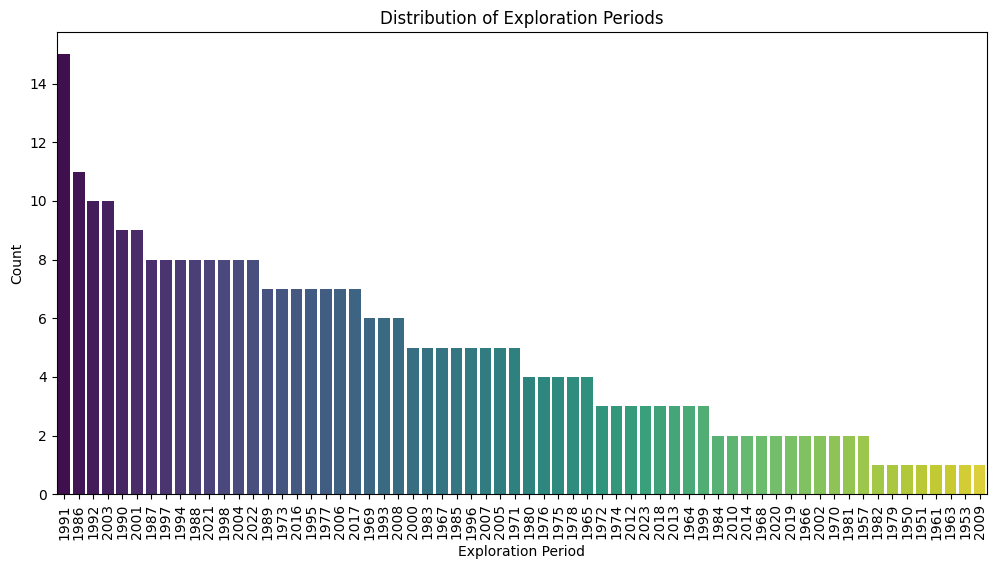

In [56]:
exploration_period_counts = df['period_of_'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=exploration_period_counts.index, y=exploration_period_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Exploration Periods')
plt.xlabel('Exploration Period')
plt.ylabel('Count')
plt.show()


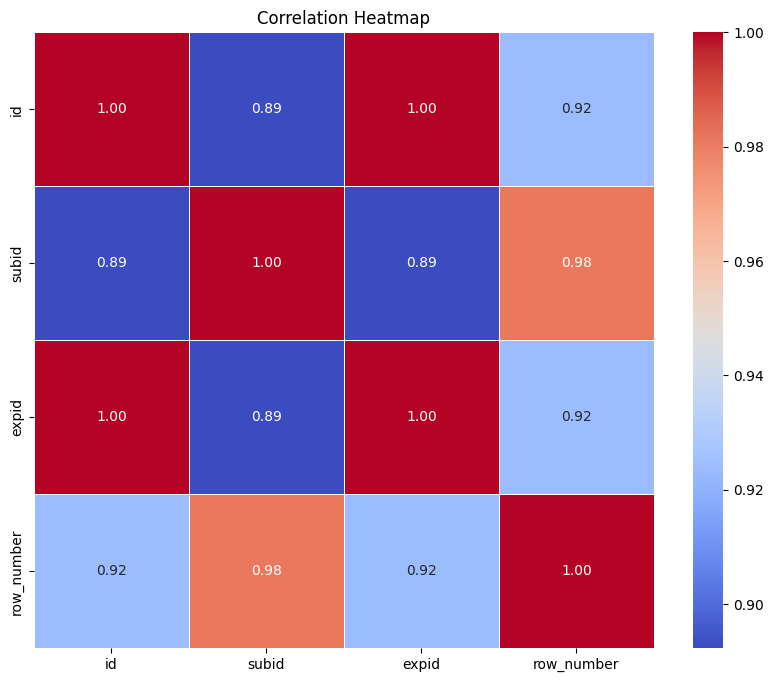

In [57]:
numeric_cols = df.select_dtypes(include=['int32', 'int64']).columns
df_numeric = df[numeric_cols]

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


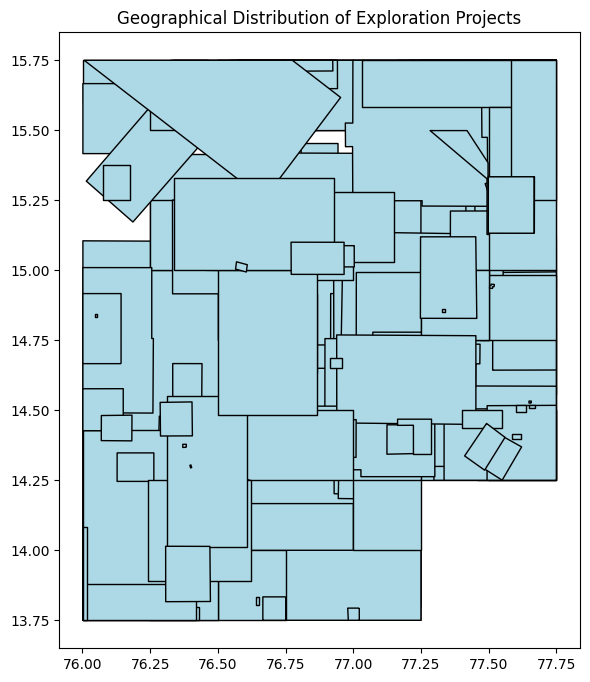

In [58]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(df, geometry='geometry')

gdf.plot(figsize=(12, 8), edgecolor='black', facecolor='lightblue')
plt.title('Geographical Distribution of Exploration Projects')
plt.show()


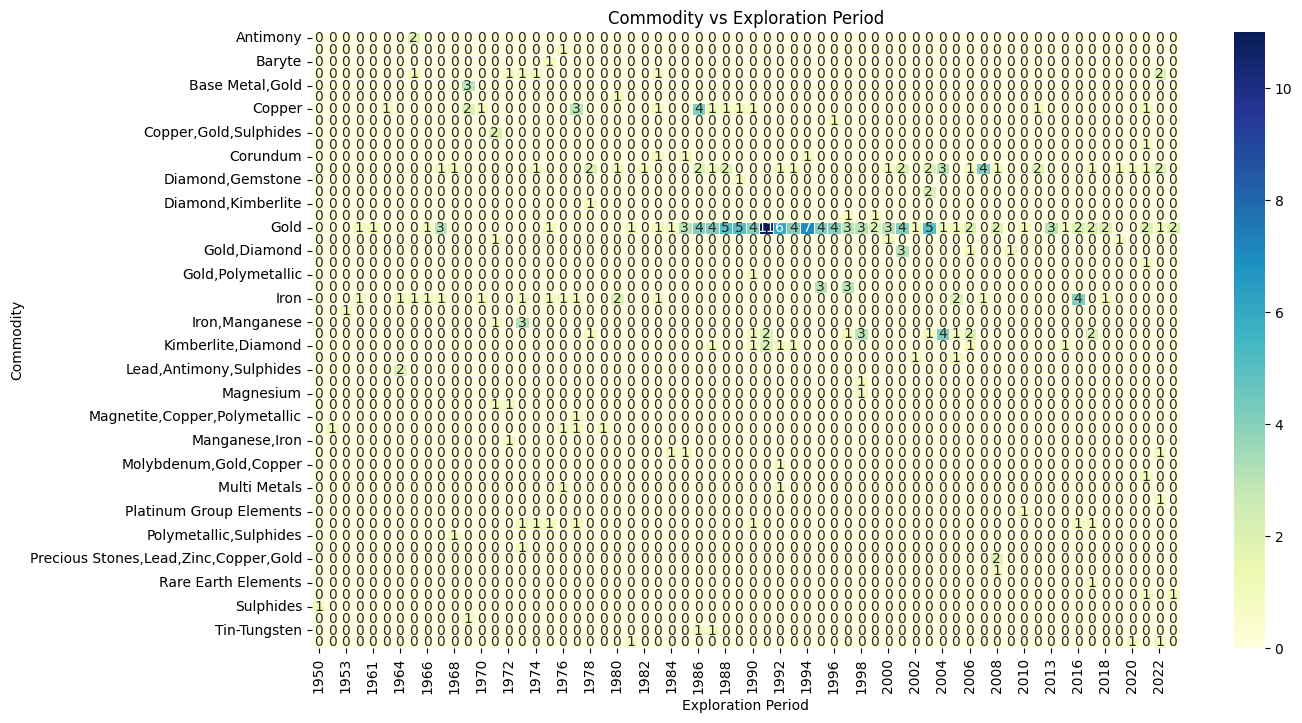

In [59]:
commodity_period = pd.crosstab(df['commodity'], df['period_of_'])

plt.figure(figsize=(14, 8))
sns.heatmap(commodity_period, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Commodity vs Exploration Period')
plt.ylabel('Commodity')
plt.xlabel('Exploration Period')
plt.show()
